In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import json
import seaborn as sns




In [2]:
noms = ['Wikipedia Movie ID','Freebase Movie ID','Movie Date Release','Character Name','Actor DOB','Actor gender','Actor height','Actor ethnicity','Actor Name','Actor age at movie release',	'Freebase character/actor map ID','Freebase character ID','Freebase actor ID']
df_char = pd.read_csv('Data/character.metadata.tsv', delimiter='\t', names = noms) 
df_char = df_char.dropna(subset=['Movie Date Release'])

df_char = df_char[df_char['Movie Date Release'].str.len() > 4]
df_char['Movie release Month'] = df_char['Movie Date Release'].str[5:7]

df_char.shape
display(df_char)


,Wikipedia Movie ID,Freebase Movie ID,Movie Date Release,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor Name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Movie release Month
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,08
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,08
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,08
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,08
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450661,913762,/m/03pcrp,1992-05-21,UN Spacy Commander,1954,M,NaN,NaN,Sonny Byrkett,38.0,/m/0kr407w,/m/0kr407_,/m/0gn4bz,05
450662,913762,/m/03pcrp,1992-05-21,Silvie Gena,1958,F,NaN,NaN,Susan Byrkett,34.0,/m/0kr40b9,/m/0kr40bf,/m/0gn4nd,05
450663,913762,/m/03pcrp,1992-05-21,Exegran,NaN,M,NaN,NaN,Hal Cleaveland,NaN,/m/0kr407c,/m/0kr406_,/m/0kr407h,05
450664,913762,/m/03pcrp,1992-05-21,Elensh,1970-05,F,NaN,NaN,Dorothy Elias-Fahn,NaN,/m/0kr406c,/m/0kr406h,/m/0b_vcv,05


In [3]:
tvt_tropes = pd.read_csv('Data/tvtropes.clusters.txt', sep='\t', names =['Character type', 'ID'])
tvt_tropes.ID[0]
tvt_tropes.head()


,Character type,ID
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


In [4]:
tvt_tropes['json_data'] = tvt_tropes['ID'].apply(json.loads)
df_json = pd.json_normalize(tvt_tropes['json_data'])
df_json.insert(0, 'Cluster', tvt_tropes['Character type'])
df_json.head()


,Cluster,char,movie,id,actor
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader


In [5]:
df_merged = df_json.merge(df_char , left_on='id', right_on='Freebase character/actor map ID', how='inner')
display(df_merged)

,Cluster,char,movie,id,actor,Wikipedia Movie ID,Freebase Movie ID,Movie Date Release,Character Name,Actor DOB,Actor gender,Actor height,Actor ethnicity,Actor Name,Actor age at movie release,Freebase character/actor map ID,Freebase character ID,Freebase actor ID,Movie release Month
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams,1344253,/m/04vcfx,1997-11-26,Professor Philip Brainard,1951-07-21,M,1.702,NaN,Robin Williams,46.0,/m/0jy9q0,/m/0cls20k,/m/0dzf_,11
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane,1486573,/m/0557n3,1994-12-21,Professor Keenbean,1955-06-25,M,NaN,NaN,Michael McShane,39.0,/m/02vchl3,/m/0h6dygh,/m/05tkfc,12
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen,5991505,/m/0fjjjh,1994-07-01,Dr. Reinhardt Lane,1939-05-25,M,1.800,NaN,Ian McKellen,55.0,/m/0k6fkc,/m/0gynqd6,/m/03ym1,07
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn,605676,/m/02vt5c,1954-06-16,Dr. Harold Medford,1877-09-26,M,NaN,NaN,Edmund Gwenn,NaN,/m/0k6_br,/m/0h5whpq,/m/03bpcj,06
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader,28327,/m/070g7,1994-10-28,Daniel Jackson,1960-02-07,M,1.780,NaN,James Spader,34.0,/m/0k3rhh,/m/02qs1z,/m/043js,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,young_gun,Morgan Earp,Tombstone,/m/0k776f,Bill Paxton,525113,/m/02ljhg,1993-12-25,Morgan Earp,1955-05-17,M,1.800,NaN,Bill Paxton,38.0,/m/0k776f,/m/0h2kg3k,/m/01s7zw,12
478,young_gun,Colorado Ryan,Rio Bravo,/m/0k2kqg,Ricky Nelson,81100,/m/0kyjk,1959-03-18,Colorado Ryan,1940-05-08,M,1.820,/m/065b6q,Ricky Nelson,18.0,/m/0k2kqg,/m/0hgx0j0,/m/01wj92r,03
479,young_gun,Tom Sawyer,The League of Extraordinary Gentlemen,/m/0k5nsh,Shane West,4138142,/m/0bl3nn,2003-07-11,Tom Sawyer,1978-06-10,M,1.820,/m/0fqz6,Shane West,25.0,/m/0k5nsh,/m/0c1sd26,/m/054v2v,07
480,young_gun,William H. 'Billy the Kid' Bonney,Young Guns II,/m/03lrjk0,Emilio Estevez,675213,/m/031zk3,1990-08-01,William H. 'Billy the Kid' Bonney,1962-05-12,M,1.638,/m/042gtr,Emilio Estevez,28.0,/m/03lrjk0,/m/0gyhwpk,/m/01z7s_,08


In [6]:
duplicates = df_merged[df_merged.duplicated()]

# Afficher les lignes en double
print(duplicates)

Empty DataFrame
Columns: [Cluster, char, movie, id, actor, Wikipedia Movie ID, Freebase Movie ID, Movie Date Release, Character Name, Actor DOB, Actor gender, Actor height, Actor ethnicity, Actor Name, Actor age at movie release, Freebase character/actor map ID, Freebase character ID, Freebase actor ID, Movie release Month]
Index: []


In [7]:
df_final = df_merged[['Cluster', 'Movie release Month']]
display(df_final)

,Cluster,Movie release Month
0,absent_minded_professor,11
1,absent_minded_professor,12
2,absent_minded_professor,07
3,absent_minded_professor,06
4,absent_minded_professor,10
...,...,...
477,young_gun,12
478,young_gun,03
479,young_gun,07
480,young_gun,08


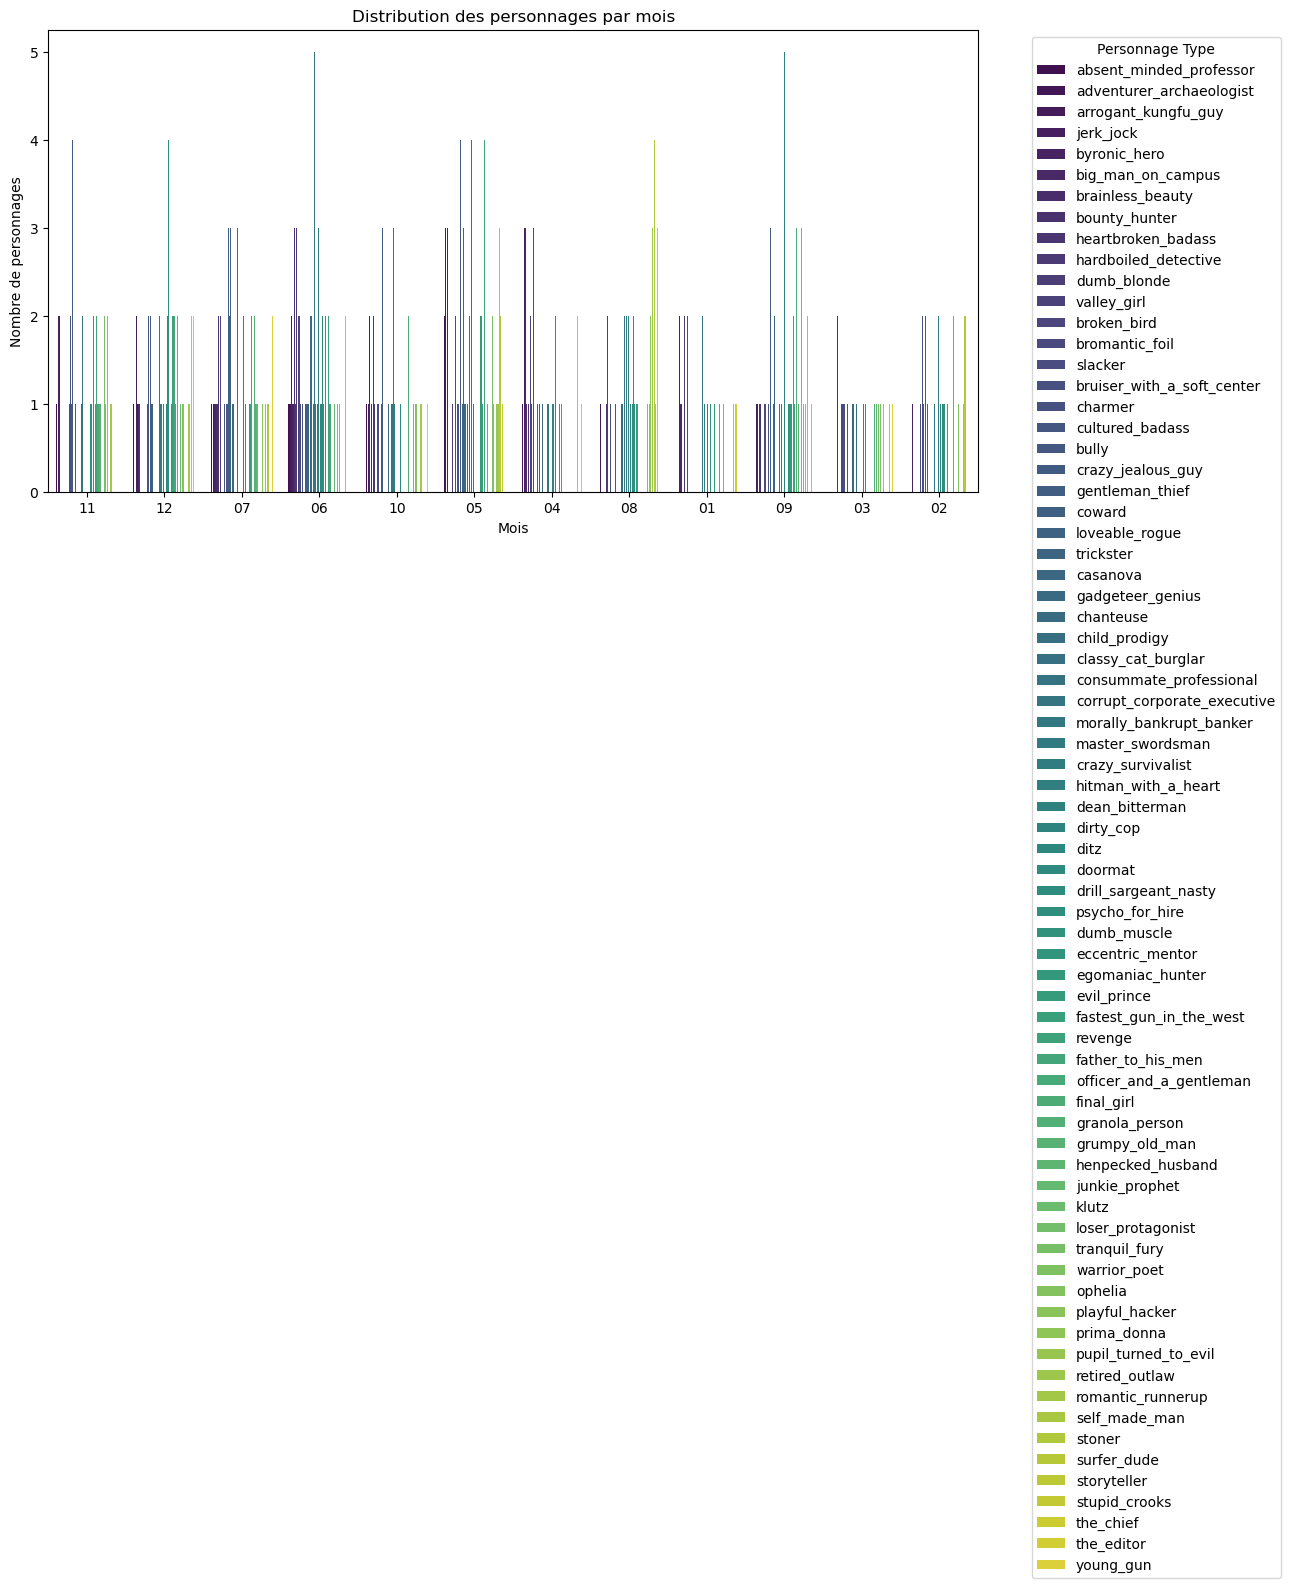

In [38]:
  # Pour des graphiques plus stylisés

# Supposons que df soit votre DataFrame fusionnée avec les informations nécessaires
# Assurez-vous d'avoir une colonne représentant les mois et une colonne pour les personnages types

# Créez un diagramme à barres pour montrer la distribution des personnages par mois
plt.figure(figsize=(12, 6))
sns.countplot(x='Movie release Month', data=df_final, hue='Cluster', palette='viridis')

# Réglez les étiquettes et le titre
plt.xlabel('Mois')
plt.ylabel('Nombre de personnages')
plt.title('Distribution des personnages par mois')

# Affichez la légende
plt.legend(title='Personnage Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le diagramme
plt.show()

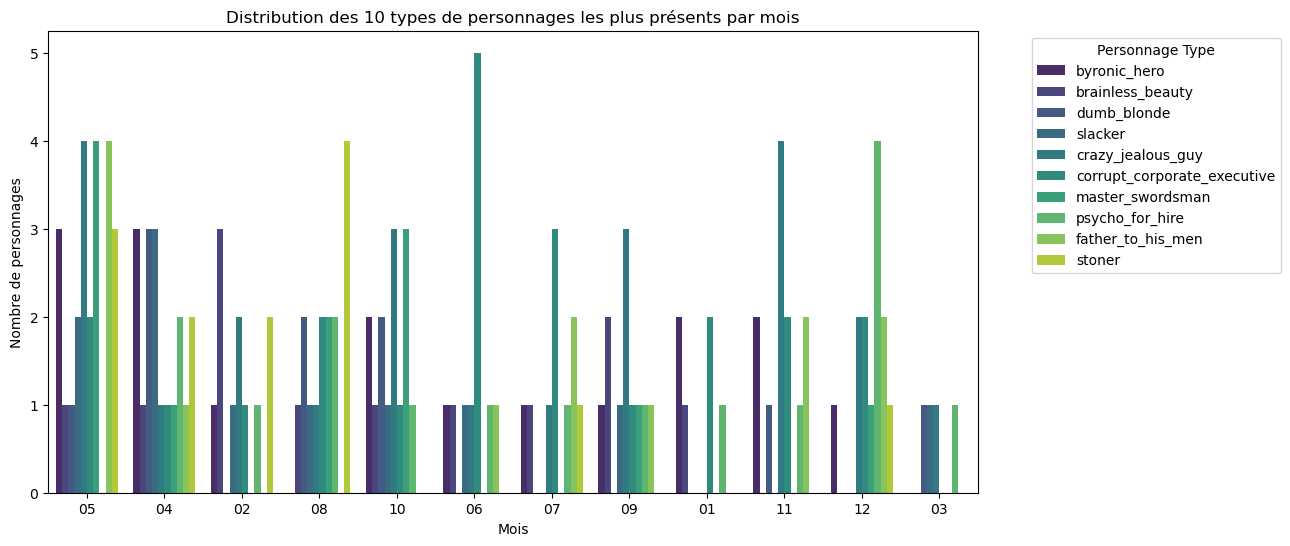

In [39]:
order_mois = ["janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre"]

# Filtrer pour inclure seulement les 10 types de personnages les plus présents
top_10_types = df_final['Cluster'].value_counts().nlargest(10).index
df_filtered = df_final[df_final['Cluster'].isin(top_10_types)]

# Créer un diagramme à barres
plt.figure(figsize=(12, 6))
sns.countplot(x='Movie release Month', data=df_filtered, hue='Cluster', palette='viridis')

# Réglez les étiquettes et le titre
plt.xlabel('Mois')
plt.ylabel('Nombre de personnages')
plt.title('Distribution des 10 types de personnages les plus présents par mois')

# Affichez la légende
plt.legend(title='Personnage Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le diagramme
plt.show()

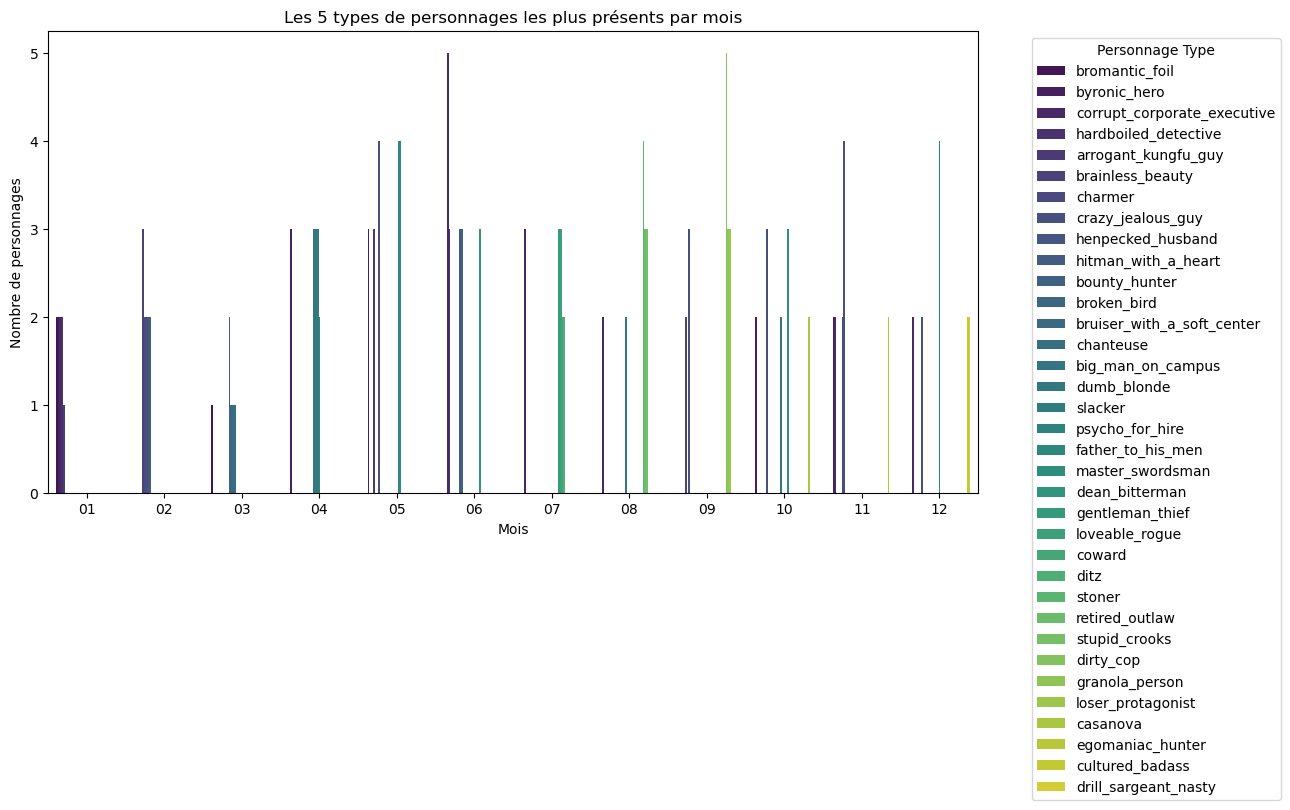

In [40]:
order_mois = ["janvier", "février", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", "décembre"]

# Groupby par mois et Cluster, puis comptez les occurrences
top_5_per_month = df_final.groupby(['Movie release Month', 'Cluster']).size().groupby('Movie release Month').nlargest(5).reset_index(level=0, drop=True).reset_index(name='Count')

# Créer un diagramme à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Movie release Month', y='Count', hue='Cluster', data=top_5_per_month, palette='viridis')

# Réglez les étiquettes et le titre
plt.xlabel('Mois')
plt.ylabel('Nombre de personnages')
plt.title('Les 5 types de personnages les plus présents par mois')

# Affichez la légende
plt.legend(title='Personnage Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le diagramme
plt.show()

In [42]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df_final['Movie release Month'], df_final['Cluster'])
display(contingency_table)
# Effectuez le test du Chi-carré
chi2, p, _, _ = chi2_contingency(contingency_table)

# Affichez les résultats du test
print(f"Test du Chi-carré : Chi2 = {chi2}, p-value = {p}")

# Interprétation du résultat
alpha = 0.05  # Niveau de signification
if p < alpha:
    print("Il y a une dépendance significative entre le mois et le cluster.")
else:
    print("Il n'y a pas de dépendance significative entre le mois et le cluster.")

Cluster,absent_minded_professor,adventurer_archaeologist,arrogant_kungfu_guy,big_man_on_campus,bounty_hunter,brainless_beauty,broken_bird,bromantic_foil,bruiser_with_a_soft_center,bully,...,storyteller,stupid_crooks,surfer_dude,the_chief,the_editor,tranquil_fury,trickster,valley_girl,warrior_poet,young_gun
Movie release Month,,,,,,,,,,,,,,,,,,,,,
01,0,0,1,1,0,1,0,2,0,0,...,0,0,1,1,1,0,0,0,0,0
02,0,0,0,0,0,3,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
03,0,0,0,0,2,0,1,1,1,0,...,0,1,0,0,0,0,0,0,1,1
04,0,1,1,3,0,1,1,0,0,0,...,0,0,0,0,1,0,0,2,0,0
05,0,2,3,0,0,1,0,1,0,0,...,0,1,2,0,0,3,3,0,2,0
06,1,1,1,1,3,1,2,0,0,0,...,0,0,2,0,0,0,1,2,1,0
07,1,0,1,1,1,1,0,0,1,1,...,0,0,1,0,0,0,0,2,0,2
08,0,0,1,0,0,1,0,0,0,0,...,0,3,1,0,0,0,0,0,1,1
09,0,0,0,0,1,2,1,0,0,0,...,1,0,0,0,0,1,1,0,0,0


Test du Chi-carré : Chi2 = 877.7622173594712, p-value = 0.008878992487940456
Il y a une dépendance significative entre le mois et le cluster.


C:\Users\jujud\AppData\Local\Temp\ipykernel_36424\2074513245.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Saison'] = df_final['Movie release Month'].apply(lambda x: ('Hiver' if x in [12, 1, 2] else


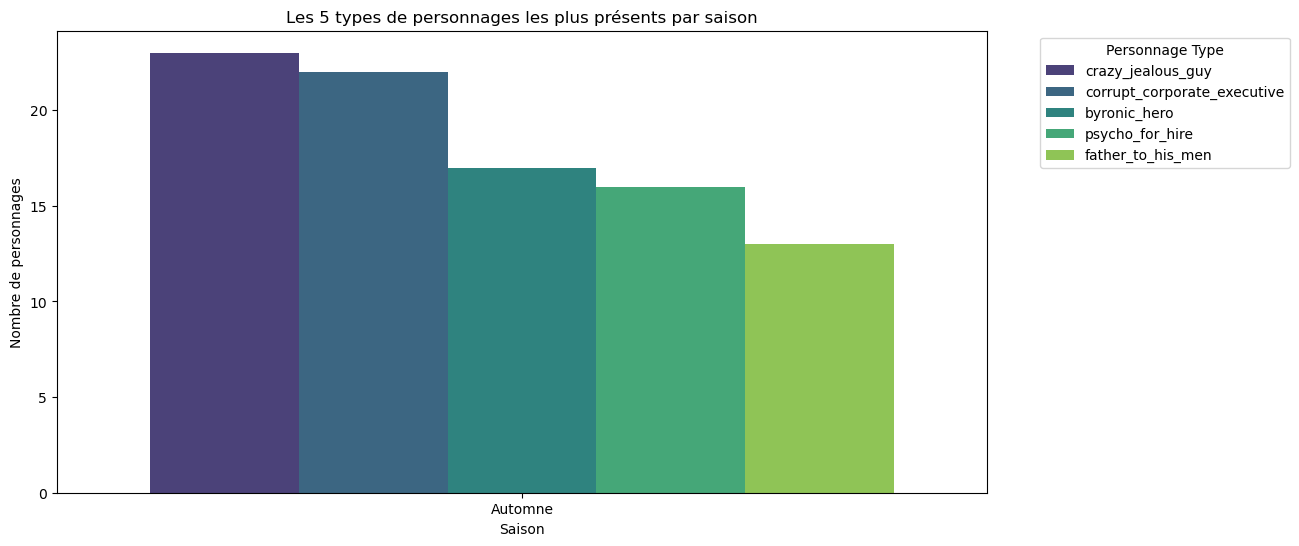

In [8]:
df_final['Saison'] = df_final['Movie release Month'].apply(lambda x: ('Hiver' if x in [12, 1, 2] else
                                                                         'Printemps' if x in [3, 4, 5] else
                                                                         'Été' if x in [6, 7, 8] else
                                                                         'Automne'))

# Groupby par saison et Cluster, puis comptez les occurrences
top_5_per_season = df_final.groupby(['Saison', 'Cluster']).size().groupby('Saison').nlargest(5).reset_index(level=0, drop=True).reset_index(name='Count')

# Créer un diagramme à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Saison', y='Count', hue='Cluster', data=top_5_per_season, palette='viridis')

# Réglez les étiquettes et le titre
plt.xlabel('Saison')
plt.ylabel('Nombre de personnages')
plt.title('Les 5 types de personnages les plus présents par saison')

# Affichez la légende
plt.legend(title='Personnage Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le diagramme
plt.show()

C:\Users\jujud\AppData\Local\Temp\ipykernel_36424\2827426911.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Movie release Month'] = pd.to_numeric(df_final['Movie release Month'], errors='coerce')
C:\Users\jujud\AppData\Local\Temp\ipykernel_36424\2827426911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Saison'] = pd.cut(df_final['Movie release Month'], bins=bins, labels=labels, include_lowest=True, right=False)


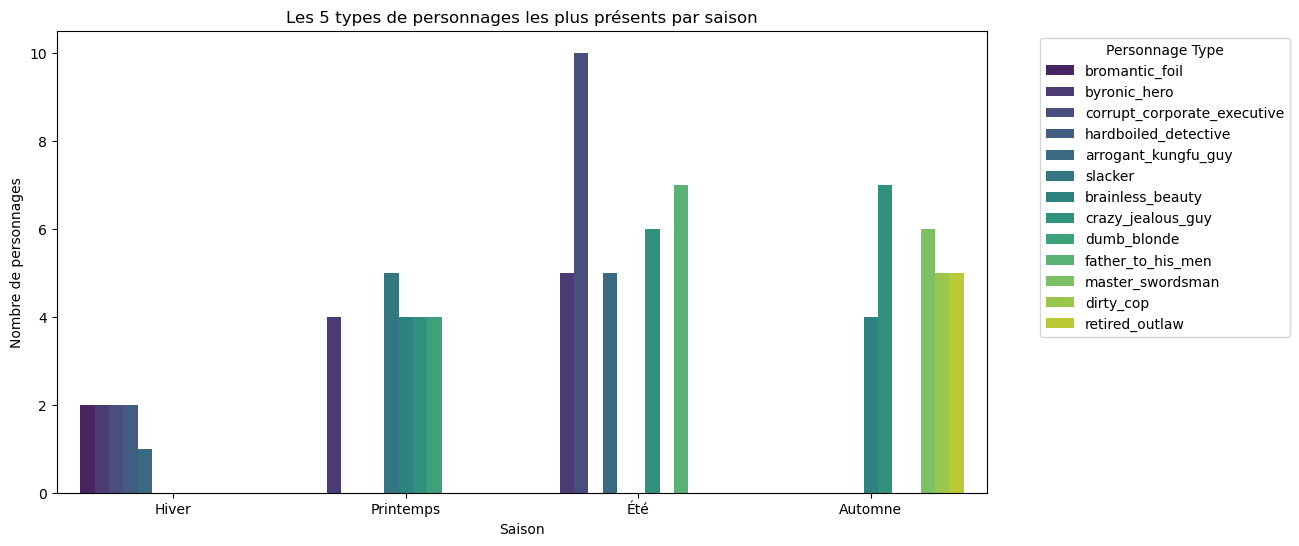

In [10]:

# Supposons que df_final soit votre DataFrame

# Convertissez la colonne 'Movie release Month' en type numérique
df_final['Movie release Month'] = pd.to_numeric(df_final['Movie release Month'], errors='coerce')

# Définissez les limites des catégories pour chaque saison
bins = [0, 2, 5, 8, 11]
labels = ['Hiver', 'Printemps', 'Été', 'Automne']

# Ajoutez une colonne 'Saison' basée sur les mois
df_final['Saison'] = pd.cut(df_final['Movie release Month'], bins=bins, labels=labels, include_lowest=True, right=False)

# Groupby par saison et Cluster, puis comptez les occurrences
top_5_per_season = df_final.groupby(['Saison', 'Cluster']).size().groupby('Saison').nlargest(5).reset_index(level=0, drop=True).reset_index(name='Count')

# Créer un diagramme à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Saison', y='Count', hue='Cluster', data=top_5_per_season, palette='viridis', order=labels)

# Réglez les étiquettes et le titre
plt.xlabel('Saison')
plt.ylabel('Nombre de personnages')
plt.title('Les 5 types de personnages les plus présents par saison')

# Affichez la légende
plt.legend(title='Personnage Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le diagramme
plt.show()


C:\Users\jujud\AppData\Local\Temp\ipykernel_36424\612341736.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Movie release Month'] = pd.to_numeric(df_final['Movie release Month'], errors='coerce')


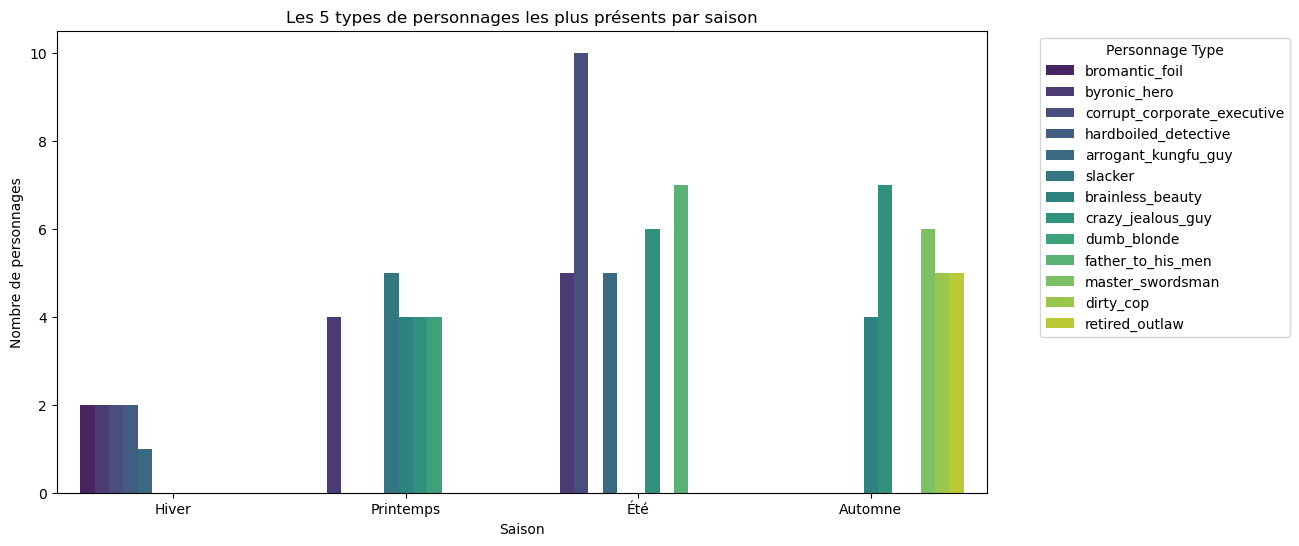

In [11]:


# Supposons que df_final soit votre DataFrame

# Convertissez la colonne 'Movie release Month' en type numérique
df_final['Movie release Month'] = pd.to_numeric(df_final['Movie release Month'], errors='coerce')

# Définissez les limites des catégories pour chaque saison
bins = [0, 2, 5, 8, 11]
labels = ['Hiver', 'Printemps', 'Été', 'Automne']

# Ajoutez une colonne 'Saison' basée sur les mois
df_final.loc[:, 'Saison'] = pd.cut(df_final['Movie release Month'], bins=bins, labels=labels, include_lowest=True, right=False)

# Groupby par saison et Cluster, puis comptez les occurrences
top_5_per_season = df_final.groupby(['Saison', 'Cluster']).size().groupby('Saison').nlargest(5).reset_index(level=0, drop=True).reset_index(name='Count')

# Créer un diagramme à barres
plt.figure(figsize=(12, 6))
sns.barplot(x='Saison', y='Count', hue='Cluster', data=top_5_per_season, palette='viridis', order=labels)

# Réglez les étiquettes et le titre
plt.xlabel('Saison')
plt.ylabel('Nombre de personnages')
plt.title('Les 5 types de personnages les plus présents par saison')

# Affichez la légende
plt.legend(title='Personnage Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le diagramme
plt.show()


In [15]:
import plotly.express as px

# Créez un graphique interactif en barres empilées
fig = px.bar(df_final, x='Movie release Month', color='Cluster')

# Affichez le graphique interactif
fig.show()


  Obtaining dependency information for plotly from https://files.pythonhosted.org/packages/a8/07/72953cf70e3bd3a24cbc3e743e6f8539abe6e3e6d83c3c0c83426eaffd39/plotly-5.18.0-py3-none-any.whl.metadata
  Obtaining dependency information for tenacity>=6.2.0 from https://files.pythonhosted.org/packages/f4/f1/990741d5bb2487d529d20a433210ffa136a367751e454214013b441c4575/tenacity-8.2.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/15.6 MB 1.7 MB/s eta 0:00:10
    --------------------------------------- 0.3/15.6 MB 2.8 MB/s eta 0:00:06
   - -------------------------------------- 0.6/15.6 MB 3.9 MB/s eta 0:00:04
   -- ------------------------------------- 1.1/15.6 MB 5.5 MB/s eta 0:00:03
   ---- ----------------------------------- 1.9/15.6 MB 7.7 MB/s eta 0:00:02
   ------ --------------------------------- 2.7/15.6 MB 8.9 MB/s eta 

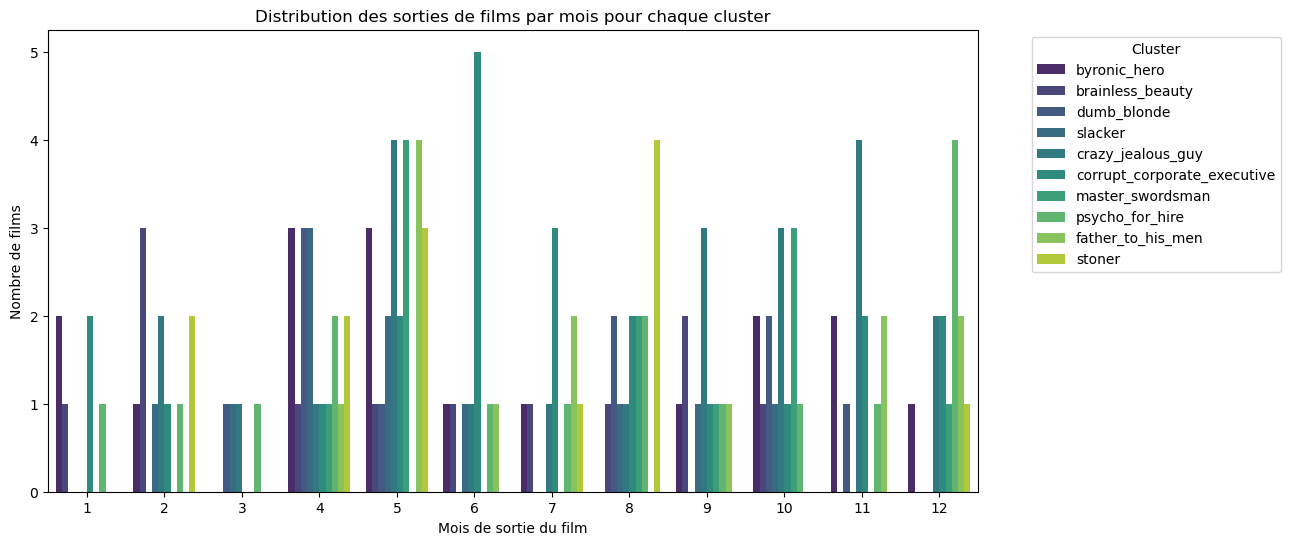

In [16]:
top_clusters = df_final['Cluster'].value_counts().nlargest(10).index
df_top_clusters = df_final[df_final['Cluster'].isin(top_clusters)]

# Créez un graphique en barres empilées
plt.figure(figsize=(12, 6))
sns.countplot(x='Movie release Month', hue='Cluster', data=df_top_clusters, palette='viridis')
# ... (réglages et affichage du graphique)


# Supposons que df_final soit votre DataFrame


# Réglez les étiquettes et le titre
plt.xlabel('Mois de sortie du film')
plt.ylabel('Nombre de films')
plt.title('Distribution des sorties de films par mois pour chaque cluster')

# Affichez la légende
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le diagramme
plt.show()



C:\Users\jujud\AppData\Local\Temp\ipykernel_36424\3675027788.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



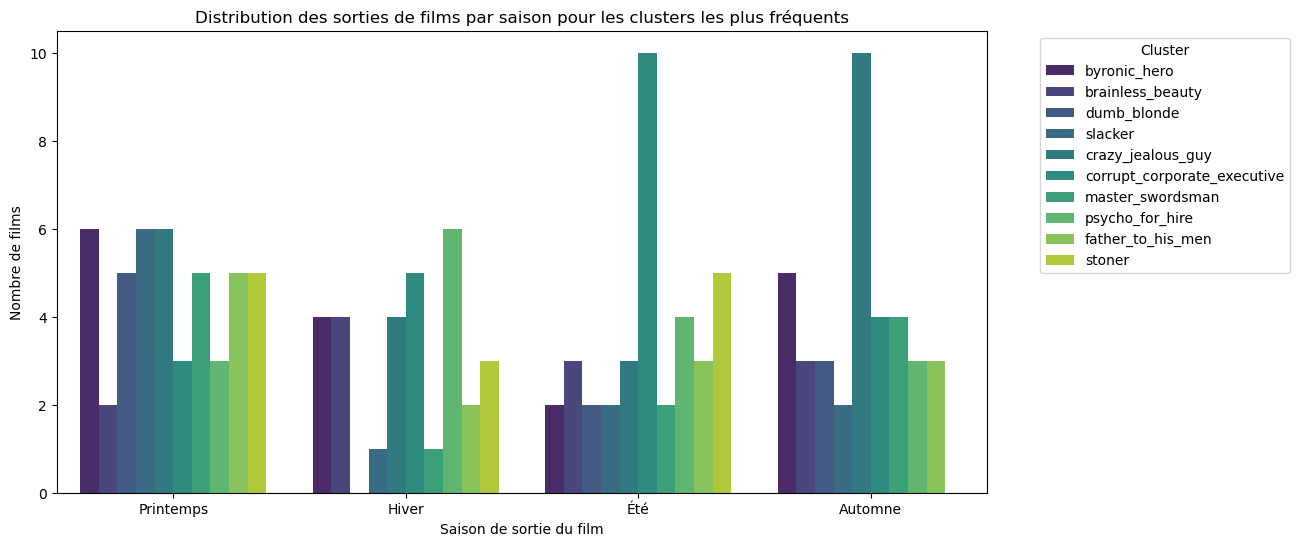

In [19]:

# Supposons que df_final soit votre DataFrame

# Filtrer les clusters les plus fréquents (par exemple, les 10 clusters les plus fréquents)
df_final['Saison'] = df_final['Movie release Month'].apply(lambda x: 'Hiver' if x in [12, 1, 2] else 'Printemps' if x in [3, 4, 5] else 'Été' if x in [6, 7, 8] else 'Automne')

top_clusters = df_final['Cluster'].value_counts().nlargest(10).index
df_top_clusters = df_final[df_final['Cluster'].isin(top_clusters)]
# Ajouter une colonne 'Saison' basée sur les mois

# Créer un graphique en barres empilées par saison pour les clusters les plus fréquents
plt.figure(figsize=(12, 6))
sns.countplot(x='Saison', hue='Cluster', data=df_top_clusters, palette='viridis')

# Réglez les étiquettes et le titre
plt.xlabel('Saison de sortie du film')
plt.ylabel('Nombre de films')
plt.title('Distribution des sorties de films par saison pour les clusters les plus fréquents')

# Affichez la légende
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le diagramme
plt.show()


In [18]:


# Supposons que df_final soit votre DataFrame

# Filtrer les clusters les plus fréquents (par exemple, les 10 clusters les plus fréquents)
top_clusters = df_final['Cluster'].value_counts().nlargest(10).index
df_top_clusters = df_final[df_final['Cluster'].isin(top_clusters)]

# Ajouter une colonne 'Saison' basée sur les mois
df_top_clusters['Saison'] = pd.cut(df_top_clusters['Movie release Month'], bins=[-1, 2, 5, 8, 11, 12], labels=['Hiver', 'Printemps', 'Été', 'Automne', 'Hiver'])

# Créer un graphique en barres empilées par saison pour les clusters les plus fréquents
plt.figure(figsize=(12, 6))
sns.countplot(x='Saison', hue='Cluster', data=df_top_clusters, palette='viridis')

# Réglez les étiquettes et le titre
plt.xlabel('Saison de sortie du film')
plt.ylabel('Nombre de films')
plt.title('Distribution des sorties de films par saison pour les clusters les plus fréquents')

# Affichez la légende
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le diagramme
plt.show()


ValueError: labels must be unique if ordered=True; pass ordered=False for duplicate labels